In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [2]:
df=pd.read_csv('forestfires.csv')
df.head(4)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0


In [3]:
df.shape

(517, 13)

In [4]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
#Missing Values:
df.isna().sum().sum()

0

# Preprocessing 

In [7]:
def ordinal_encode(df,column,ordering):
    # df : dataFrame, column : column Name , ordering : List of item in order decided.
    # ordering.index(x) : the index of x in the ordred list 
    # in this funcyion we want to encode ordinal data :
    # Example of uses : ordering = ("low","mediom","haight")=>z(0,1,2)
    df = df.copy()
    df[column]=df[column].apply(lambda x : ordering.index(x))
    
    return df

In [8]:
def preprocess_inputs(df,task='regression'):
    #Add preprocessing Steps
    df = df.copy()
    df = ordinal_encode(df,
                        column='month',
                        ordering=[ 'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
    df = ordinal_encode(df,column='day',ordering=[ 'sun', 'mon','tue','wed','thu','fri','sat'])
    if task=='regression':
        y=df['area']
    else:
        # we want to use binary classification 0:small fire 1:largest fire 
        y=df['area'].apply(lambda x: 1 if x>0 else 0)
    #Lets drop the area from our dataset and return the X and y
    X = df.drop('area',axis=1)
    #split the data to train and test sets
    from sklearn.model_selection import train_test_split 
    X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)
    return  X_train , X_test , y_train , y_test

# Regression

In [9]:
X_train , X_test , y_train , y_test= preprocess_inputs(df,'regression')
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
13,6,5,8,1,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0
61,2,2,2,0,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0
453,4,5,7,4,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0
39,4,4,2,2,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0
373,5,4,7,4,94.8,222.4,698.6,13.9,20.3,42,2.7,0.0


In [85]:
y_train

13       0.00
61       0.00
453      0.00
39       0.00
373      0.00
        ...  
129      0.00
144      0.77
72       0.00
235    196.48
37       0.00
Name: area, Length: 361, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)
y_pred = lin_reg_model.predict(X_test)
y_pred.shape=(156,1)
print("Linear regression R**2 : {:.2f}".format(lin_reg_model.score(X_test,y_test)))

Linear regression R**2 : 0.02


In [32]:
y_pred.shape

(156, 1)

In [55]:
X_test.shape

(156, 12)

Text(0.5, 1.0, 'hhh')

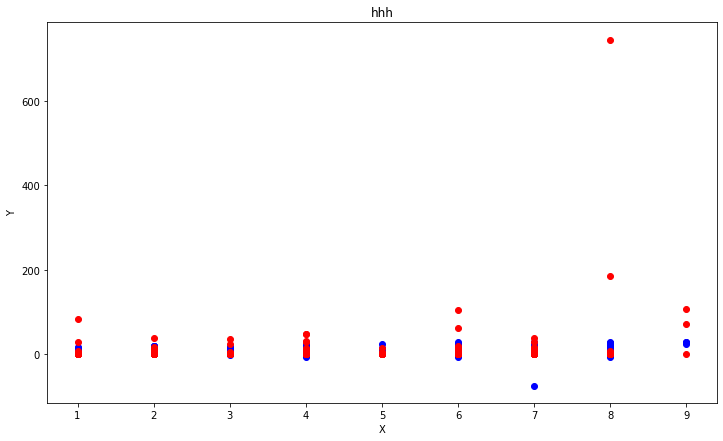

In [82]:
plt.figure(figsize=(12,7))
plt.scatter(X_test.iloc[:,:1],y_pred , c="b")
plt.scatter(X_test.iloc[:,:1],y_test , c="r")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("hhh")

# Classification 

In [86]:
X_train , X_test , y_train , y_test= preprocess_inputs(df,'classification')
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
13,6,5,8,1,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0
61,2,2,2,0,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0
453,4,5,7,4,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0
39,4,4,2,2,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0
373,5,4,7,4,94.8,222.4,698.6,13.9,20.3,42,2.7,0.0


In [90]:
from sklearn.linear_model import LogisticRegression
model_class = LogisticRegression(max_iter=10000)
model_class.fit(X_train,y_train)
model_class.score(X_test,y_test)

0.46794871794871795